In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('Fraud Detection Transactions Dataset.csv')
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,14-08-2023 19:30,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3,Amex,65,883.17,Biometric,0.8494,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,07-06-2023 04:01,75725.25,Mobile,New York,Clothing,0.0,...,NaN,478.76,4,Mastercard,186,2203.36,Password,0.0959,0.0,1
2,TXN_199,USER_2734,28.96,Online,20-06-2023 15:25,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4,Visa,226,1909.29,Biometric,0.8400,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,07-12-2023 00:31,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4,Visa,76,1311.86,OTP,0.7935,0.0,1
4,TXN_39489,USER_2014,31.28,POS,11-11-2023 23:44,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4,Mastercard,140,966.98,Password,0.3819,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,29-01-2023 18:38,76960.11,Mobile,Tokyo,Clothing,0.0,...,2.0,389.00,3,Amex,98,1537.54,PIN,0.1493,1.0,0
49996,TXN_44732,USER_1171,126.15,POS,09-05-2023 08:55,28791.75,Mobile,Tokyo,Clothing,0.0,...,13.0,434.95,4,Visa,93,2555.72,Biometric,0.3653,0.0,1
49997,TXN_38158,USER_2510,72.02,Online,30-01-2023 19:32,29916.41,Laptop,Mumbai,Clothing,0.0,...,1.0,369.15,2,Visa,114,4686.59,Biometric,0.5195,0.0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,09-03-2023 19:47,67895.67,Mobile,Tokyo,Electronics,0.0,...,13.0,242.29,4,Discover,72,4886.92,Biometric,0.7063,0.0,1


In [4]:
df.shape

(50000, 21)

In [5]:
df.dtypes

Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                 float64
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                      float64
Fraud_Label                       int64
dtype: object

In [6]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,14-08-2023 19:30,93213.17,Laptop,Sydney,Travel,0.0,...,7.0,437.63,3,Amex,65,883.17,Biometric,0.8494,0.0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,07-06-2023 04:01,75725.25,Mobile,New York,Clothing,0.0,...,NaN,478.76,4,Mastercard,186,2203.36,Password,0.0959,0.0,1
2,TXN_199,USER_2734,28.96,Online,20-06-2023 15:25,1588.96,Tablet,Mumbai,Restaurants,0.0,...,14.0,50.01,4,Visa,226,1909.29,Biometric,0.8400,0.0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,07-12-2023 00:31,76807.20,Tablet,New York,Clothing,0.0,...,8.0,182.48,4,Visa,76,1311.86,OTP,0.7935,0.0,1
4,TXN_39489,USER_2014,31.28,POS,11-11-2023 23:44,92354.66,Mobile,Mumbai,Electronics,0.0,...,14.0,328.69,4,Mastercard,140,966.98,Password,0.3819,1.0,1


In [7]:
df.tail()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
49995,TXN_11284,USER_4796,45.05,Online,29-01-2023 18:38,76960.11,Mobile,Tokyo,Clothing,0.0,...,2.0,389.00,3,Amex,98,1537.54,PIN,0.1493,1.0,0
49996,TXN_44732,USER_1171,126.15,POS,09-05-2023 08:55,28791.75,Mobile,Tokyo,Clothing,0.0,...,13.0,434.95,4,Visa,93,2555.72,Biometric,0.3653,0.0,1
49997,TXN_38158,USER_2510,72.02,Online,30-01-2023 19:32,29916.41,Laptop,Mumbai,Clothing,0.0,...,1.0,369.15,2,Visa,114,4686.59,Biometric,0.5195,0.0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,09-03-2023 19:47,67895.67,Mobile,Tokyo,Electronics,0.0,...,13.0,242.29,4,Discover,72,4886.92,Biometric,0.7063,0.0,1
49999,TXN_15795,USER_6529,13.00,Bank Transfer,19-08-2023 23:57,7668.82,Tablet,London,Restaurants,0.0,...,5.0,273.78,1,Mastercard,154,1568.95,OTP,0.8938,0.0,1


In [8]:
df.columns

Index(['Transaction_ID', 'User_ID', 'Transaction_Amount', 'Transaction_Type',
       'Timestamp', 'Account_Balance', 'Device_Type', 'Location',
       'Merchant_Category', 'IP_Address_Flag', 'Previous_Fraudulent_Activity',
       'Daily_Transaction_Count', 'Avg_Transaction_Amount_7d',
       'Failed_Transaction_Count_7d', 'Card_Type', 'Card_Age',
       'Transaction_Distance', 'Authentication_Method', 'Risk_Score',
       'Is_Weekend', 'Fraud_Label'],
      dtype='object')

In [9]:
df.isnull().sum()

Transaction_ID                    0
User_ID                           0
Transaction_Amount                0
Transaction_Type                  0
Timestamp                         0
Account_Balance                   0
Device_Type                       0
Location                          0
Merchant_Category                 0
IP_Address_Flag                  73
Previous_Fraudulent_Activity     61
Daily_Transaction_Count         117
Avg_Transaction_Amount_7d         0
Failed_Transaction_Count_7d       0
Card_Type                         0
Card_Age                          0
Transaction_Distance              0
Authentication_Method             0
Risk_Score                        0
Is_Weekend                       64
Fraud_Label                       0
dtype: int64

In [10]:
df['IP_Address_Flag'].unique()

array([ 0.,  1., nan])

In [11]:
df['IP_Address_Flag']=df['IP_Address_Flag'].fillna(df['IP_Address_Flag'].mode()[0])

In [12]:
df['Previous_Fraudulent_Activity'].unique()

array([ 0.,  1., nan])

In [13]:
df['Previous_Fraudulent_Activity']=df['Previous_Fraudulent_Activity'].fillna(df['Previous_Fraudulent_Activity'].mode()[0])

In [14]:
df['Daily_Transaction_Count'].unique()

array([ 7., nan, 14.,  8.,  3.,  2.,  6.,  4., 11.,  1., 13.,  9., 12.,
        5., 10.])

In [15]:
df['Daily_Transaction_Count']=df['Daily_Transaction_Count'].fillna(df['Daily_Transaction_Count'].mean())

In [16]:
df.drop(['Transaction_ID'],axis=1,inplace=True)
df.drop(['User_ID'],axis=1,inplace=True)
df.columns = df.columns.str.strip()
df.drop(['Timestamp'], axis=1, inplace=True)
df.drop(['Transaction_Distance'],axis=1,inplace=True)
df.drop(['Is_Weekend'],axis=1,inplace=True)
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0.0,0.0,7.000000,437.63,3,Amex,65,Biometric,0.8494,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0.0,0.0,7.485476,478.76,4,Mastercard,186,Password,0.0959,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0.0,0.0,14.000000,50.01,4,Visa,226,Biometric,0.8400,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0.0,0.0,8.000000,182.48,4,Visa,76,OTP,0.7935,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0.0,1.0,14.000000,328.69,4,Mastercard,140,Password,0.3819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0.0,0.0,2.000000,389.00,3,Amex,98,PIN,0.1493,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0.0,0.0,13.000000,434.95,4,Visa,93,Biometric,0.3653,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,0.0,1.0,1.000000,369.15,2,Visa,114,Biometric,0.5195,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0.0,0.0,13.000000,242.29,4,Discover,72,Biometric,0.7063,1


In [17]:
df.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Account_Balance',
       'Device_Type', 'Location', 'Merchant_Category', 'IP_Address_Flag',
       'Previous_Fraudulent_Activity', 'Daily_Transaction_Count',
       'Avg_Transaction_Amount_7d', 'Failed_Transaction_Count_7d', 'Card_Type',
       'Card_Age', 'Authentication_Method', 'Risk_Score', 'Fraud_Label'],
      dtype='object')

In [18]:
df1=df['Transaction_Amount'].value_counts()
df1

Transaction_Amount
7.65      14
8.74      13
0.24      13
18.58     12
6.50      12
          ..
258.79     1
342.27     1
225.31     1
90.01      1
58.78      1
Name: count, Length: 21763, dtype: int64

<BarContainer object of 21763 artists>

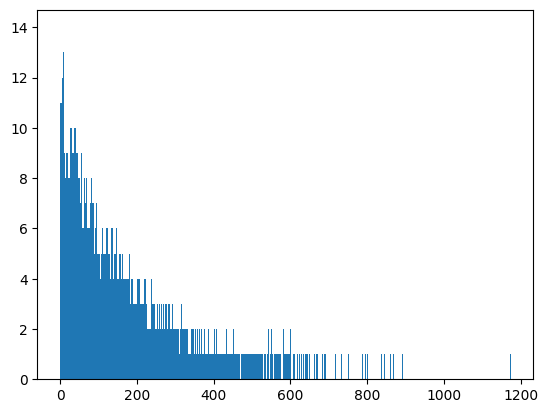

In [19]:
plt.bar(df1.index,df1.values)

<BarContainer object of 21763 artists>

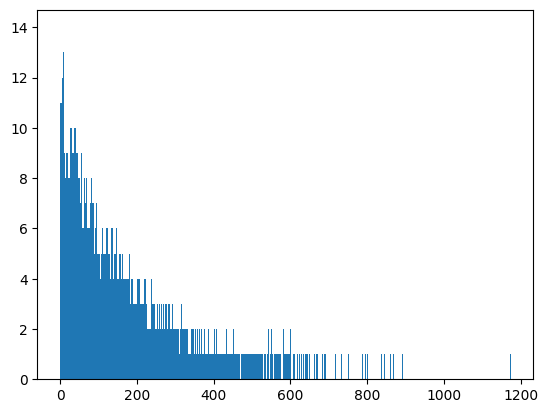

In [20]:
df2=df['Transaction_Amount'].value_counts()
plt.bar(df2.index,df2.values)

<BarContainer object of 49867 artists>

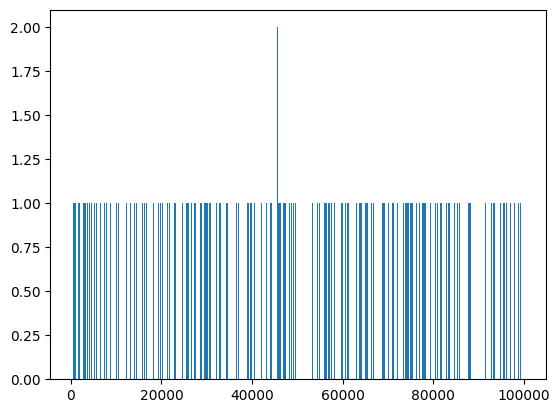

In [21]:
df3=df['Account_Balance'].value_counts()
plt.bar(df3.index,df3.values)

<BarContainer object of 3 artists>

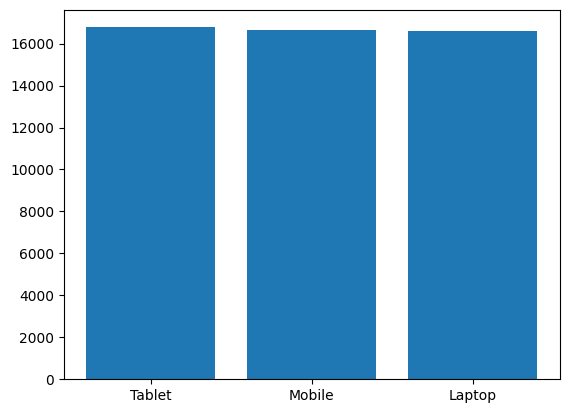

In [22]:
df4=df['Device_Type'].value_counts()
plt.bar(df4.index,df4.values)

<BarContainer object of 5 artists>

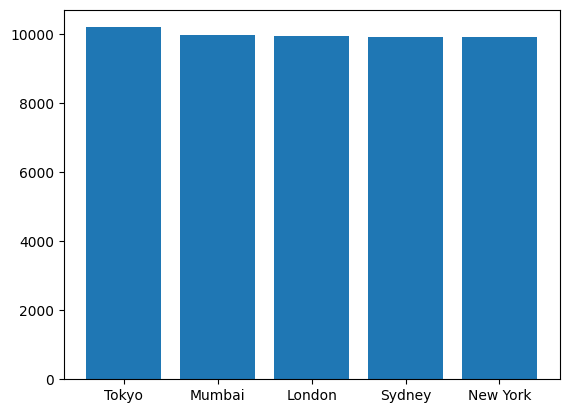

In [23]:
df5=df['Location'].value_counts()
plt.bar(df5.index,df5.values)

<BarContainer object of 5 artists>

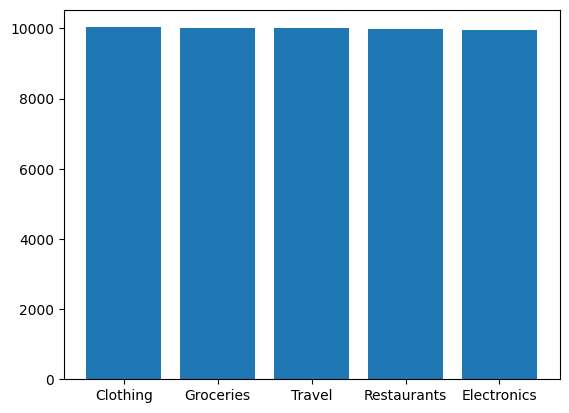

In [24]:
df6=df['Merchant_Category'].value_counts()
plt.bar(df6.index,df6.values)

<BarContainer object of 2 artists>

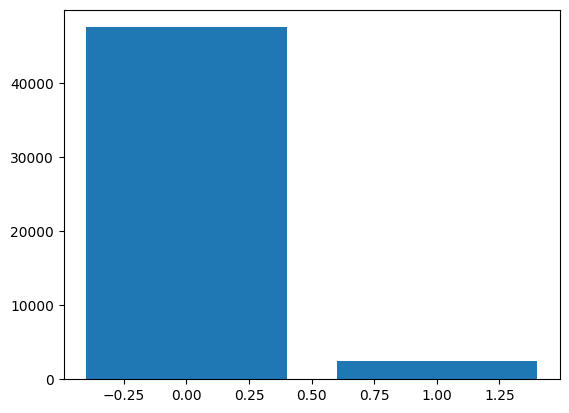

In [25]:
df7=df['IP_Address_Flag'].value_counts()
plt.bar(df7.index,df7.values)

<BarContainer object of 2 artists>

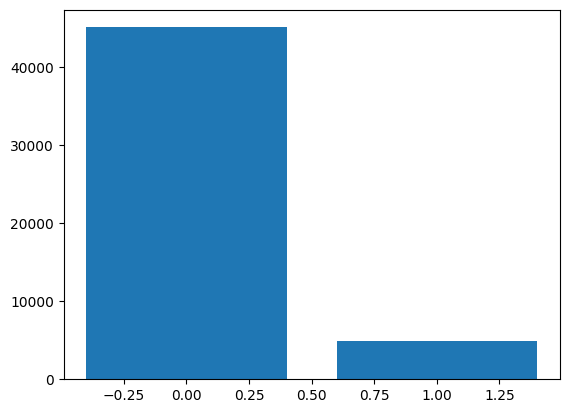

In [26]:
df8=df['Previous_Fraudulent_Activity'].value_counts()
plt.bar(df8.index,df8.values)

<BarContainer object of 15 artists>

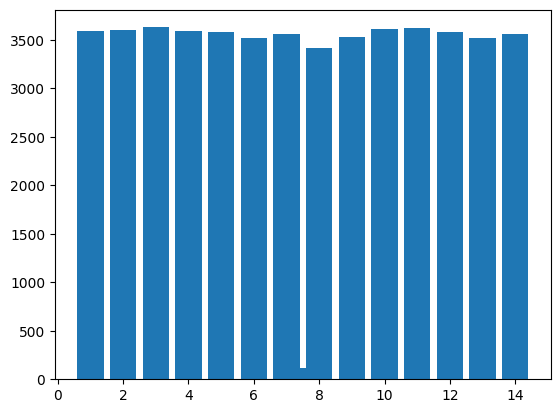

In [27]:
df9=df['Daily_Transaction_Count'].value_counts()
plt.bar(df9.index,df9.values)

<BarContainer object of 31420 artists>

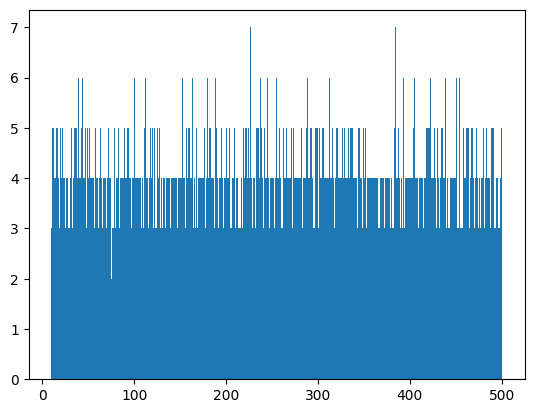

In [28]:
df10=df['Avg_Transaction_Amount_7d'].value_counts()
plt.bar(df10.index,df10.values)

<BarContainer object of 5 artists>

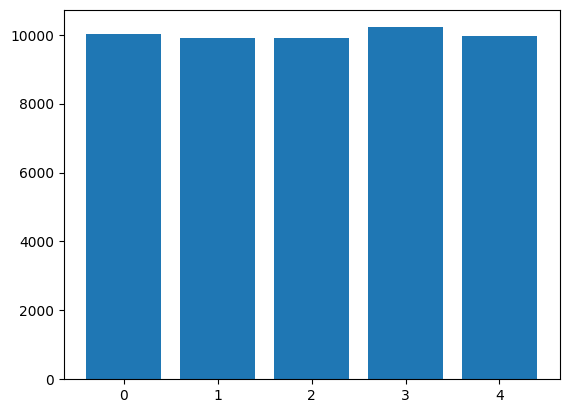

In [29]:
df11=df['Failed_Transaction_Count_7d'].value_counts()
plt.bar(df11.index,df11.values)

<BarContainer object of 4 artists>

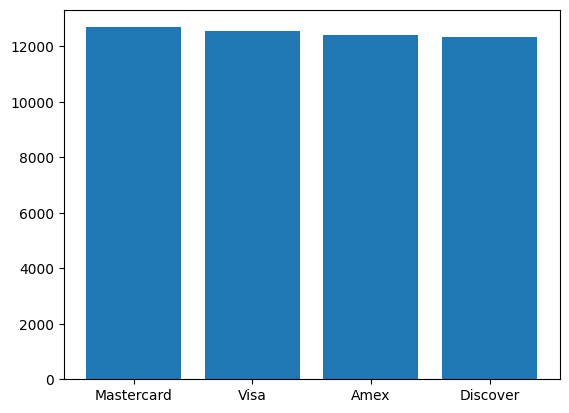

In [30]:
df12=df['Card_Type'].value_counts()
plt.bar(df12.index,df12.values)

<BarContainer object of 239 artists>

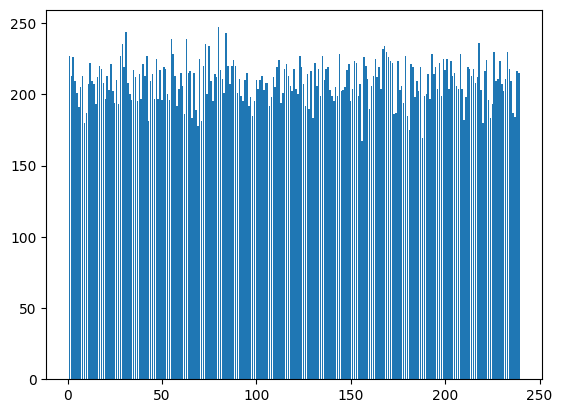

In [31]:
df13=df['Card_Age'].value_counts()
plt.bar(df13.index,df13.values)

<BarContainer object of 4 artists>

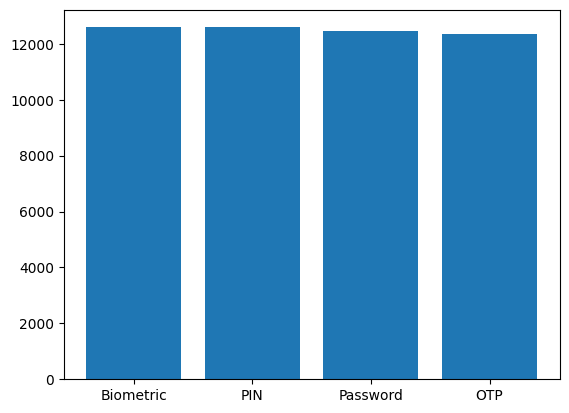

In [32]:
df14=df['Authentication_Method'].value_counts()
plt.bar(df14.index,df14.values)

<BarContainer object of 9931 artists>

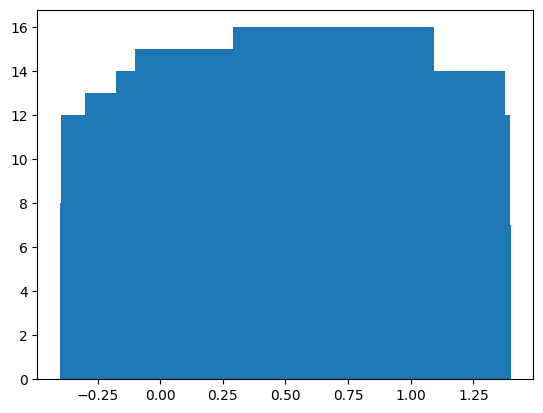

In [33]:
df15=df['Risk_Score'].value_counts()
plt.bar(df15.index,df15.values)

<BarContainer object of 2 artists>

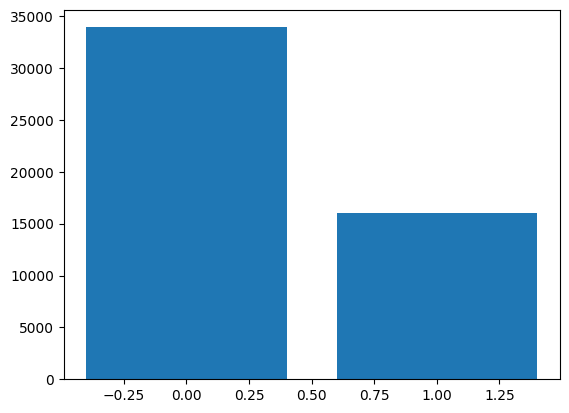

In [34]:
df16=df['Fraud_Label'].value_counts()
plt.bar(df16.index,df16.values)

In [35]:
df.dtypes

Transaction_Amount              float64
Transaction_Type                 object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                 float64
Previous_Fraudulent_Activity    float64
Daily_Transaction_Count         float64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Authentication_Method            object
Risk_Score                      float64
Fraud_Label                       int64
dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Transaction_Type']=lab.fit_transform(df['Transaction_Type'])      # in the previous question there is achange in this line because it is done in list and this is a dataframe
df['Device_Type']=lab.fit_transform(df['Device_Type'])
df['Location']=lab.fit_transform(df['Location'])
df['Merchant_Category']=lab.fit_transform(df['Merchant_Category'])
df['Card_Type']=lab.fit_transform(df['Card_Type'])
df['Authentication_Method']=lab.fit_transform(df['Authentication_Method'])
df

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Authentication_Method,Risk_Score,Fraud_Label
0,39.79,3,93213.17,0,3,4,0.0,0.0,7.000000,437.63,3,0,65,0,0.8494,0
1,1.19,1,75725.25,1,2,0,0.0,0.0,7.485476,478.76,4,2,186,3,0.0959,1
2,28.96,2,1588.96,2,1,3,0.0,0.0,14.000000,50.01,4,3,226,0,0.8400,1
3,254.32,0,76807.20,2,2,0,0.0,0.0,8.000000,182.48,4,3,76,1,0.7935,1
4,31.28,3,92354.66,1,1,1,0.0,1.0,14.000000,328.69,4,2,140,3,0.3819,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,2,76960.11,1,4,0,0.0,0.0,2.000000,389.00,3,0,98,2,0.1493,0
49996,126.15,3,28791.75,1,4,0,0.0,0.0,13.000000,434.95,4,3,93,0,0.3653,1
49997,72.02,2,29916.41,0,1,0,0.0,1.0,1.000000,369.15,2,3,114,0,0.5195,0
49998,64.89,1,67895.67,1,4,1,0.0,0.0,13.000000,242.29,4,1,72,0,0.7063,1


In [37]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [39]:
x_train

array([[1.333000e+01, 1.000000e+00, 6.186916e+04, ..., 7.700000e+01,
        2.000000e+00, 4.009000e-01],
       [7.481000e+01, 0.000000e+00, 3.953589e+04, ..., 5.300000e+01,
        2.000000e+00, 3.106000e-01],
       [2.954400e+02, 2.000000e+00, 5.118780e+04, ..., 1.360000e+02,
        2.000000e+00, 5.135000e-01],
       ...,
       [9.854000e+01, 0.000000e+00, 2.882533e+04, ..., 2.100000e+02,
        1.000000e+00, 7.671000e-01],
       [1.968300e+02, 3.000000e+00, 9.583690e+04, ..., 2.130000e+02,
        3.000000e+00, 9.580000e-01],
       [1.642300e+02, 0.000000e+00, 5.005152e+04, ..., 9.000000e+01,
        3.000000e+00, 8.156000e-01]], shape=(35000, 15))

In [40]:
x_test

array([[1.998000e+01, 2.000000e+00, 1.804810e+03, ..., 2.140000e+02,
        1.000000e+00, 6.865000e-01],
       [4.532000e+01, 1.000000e+00, 4.664803e+04, ..., 7.800000e+01,
        3.000000e+00, 5.322000e-01],
       [3.225000e+01, 0.000000e+00, 8.024456e+04, ..., 5.900000e+01,
        3.000000e+00, 4.924000e-01],
       ...,
       [1.797900e+02, 2.000000e+00, 2.318642e+04, ..., 2.130000e+02,
        2.000000e+00, 4.251000e-01],
       [1.079700e+02, 3.000000e+00, 4.165537e+04, ..., 1.620000e+02,
        1.000000e+00, 2.077000e-01],
       [1.150000e+01, 0.000000e+00, 1.860979e+04, ..., 5.100000e+01,
        1.000000e+00, 7.172000e-01]], shape=(15000, 15))

In [41]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], shape=(15000,))

In [42]:
y_test


array([0, 0, 0, ..., 0, 0, 0], shape=(15000,))

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[6664, 3474],
       [2491, 2371]])

In [44]:
score=accuracy_score(y_test,y_pred)
score

0.6023333333333334

In [45]:
print(model.predict([[500,2,50000,1,4,0,1,1,5,180,2,0,100,0,0.1234]]))

[1]
